## European Alliances

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.pyplot import pause
from matplotlib.colors import Normalize
import numpy as np
from scipy.integrate import solve_ivp
from scipy.linalg import solve_lyapunov
import pylab

### Triple Alliance 1882

In [2]:
G = nx.Graph()
N = 6

In [3]:
#G.add_weighted_edges_from([
G.add_edge(0,1,weight=-1,color='r')
G.add_edge(0,4,weight=-1,color='r')
G.add_edge(0,5,weight=-1,color='r')
G.add_edge(1,2,weight=1,color='b')
G.add_edge(1,3,weight=1,color='b')
G.add_edge(1,4,weight=1,color='b')
G.add_edge(1,5,weight=-1,color='r')
G.add_edge(2,3,weight=1,color='b')
G.add_edge(2,4,weight=1,color='b')
G.add_edge(2,5,weight=-1,color='r')
G.add_edge(4,5,weight=-1,color='r')
#])

In [4]:
colors = [G[u][v]['color'] for u,v in G.edges()]

In [5]:
labels={0:"GB", 1:"AH", 2:"Ge", 3:"It", 4:"Ru", 5:"Fr"}

In [6]:
pos = nx.circular_layout(G)

/usr/local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


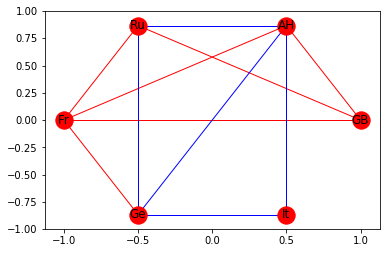

In [7]:
nx.draw_networkx(G, edge_color=colors, labels=labels, pos=pos)

In [8]:
A = nx.adjacency_matrix(G).transpose()
D = np.diag(np.asarray(np.sum(A, axis=1)).reshape(-1))
L = D - A
np.linalg.matrix_rank(L)

5

##### Directed network

In [9]:
g_ta1882 = nx.DiGraph()

In [10]:
g_ta1882.add_edge(2,3)
g_ta1882.add_edge(2,1)
g_ta1882.add_edge(4,2)
g_ta1882.add_edge(5,2)
g_ta1882.add_edge(0,2)

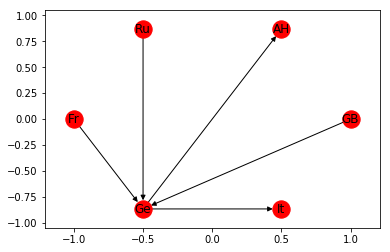

In [11]:
nx.draw_networkx(g_ta1882, labels=labels, pos=pos)

In [12]:
def orth_matrix(A):
    u, s, vh = np.linalg.svd(A, full_matrices=True)
    M, N = u.shape[0], vh.shape[1]
    rcond = np.finfo(s.dtype).eps * max(M, N)
    tol = np.amax(s) * rcond
    num = np.sum(s > tol, dtype=int)
    Q = vh[0:num,:].T.conj()
    return Q

In [13]:
Q = orth_matrix(L).T
rL = np.matmul(Q, np.matmul(L, np.transpose(Q)))
sigma = solve_lyapunov(rL, np.identity(np.linalg.matrix_rank(L)))
x = 2*np.matmul(np.transpose(Q), np.matmul(sigma, Q))
eqL = np.linalg.pinv(x)

In [14]:
neg_g_ta1882 = nx.Graph()

for i in np.arange(0,N):
    for j in np.arange(i+1,N):
        if(eqL[i,j] < -1e-6):
            neg_g_ta1882.add_edge(i,j)

/usr/local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


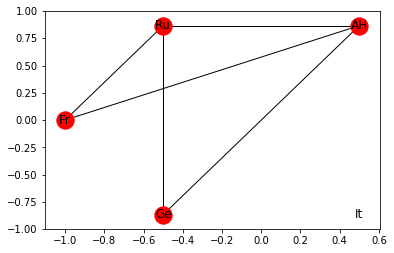

In [15]:
nx.draw_networkx(neg_g_ta1882, labels=labels, pos=pos)